<a href="https://colab.research.google.com/github/myname1sace/Lam8da_2025/blob/main/Lambda_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

\## Import Packages 📦

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import seaborn as sns

pd.set_option("display.max_columns", None) # To display all the columns listed at once

# scikit-learn library
from sklearn.preprocessing import LabelEncoder


## 🛃 Extract the Dataset

In [ ]:
data = '/content/sample_data/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [ ]:
# Import the dataset
df = pd.read_csv(data)

## View the Churn Dataset

In [ ]:
# Have a glimpse at the dataset
df.head()

## 📚 Understand the Telco Customer Churn

---------------------------

**Data Dictionary:**  

    :Number of Instances/Rows: 7043

    :Number of Attributes: 21 numeric/categorical predictive. The Target variable is the Churn.

    :Attribute Information (in order):
        1. Customer ID                customer ID
        2. gender                     Whether the customer is a male or a female
        3. SeniorCitizen              Whether the customer is a senior citizen or not (1, 0)
        4. Partner                    Whether the customer has a partner or not (Yes, No)
        5. Dependents                 Whether the customer has dependents or not (Yes, No)
        6. tenure                     Number of months the customer has stayed with the company
        7. PhoneService               Whether the customer has a phone service or not (Yes, No)
        8. MultipleLines              Whether the customer has multiple lines or not (Yes, No, No phone service)
        9. InternetService            Customer’s internet service provider (DSL, Fiber optic, No)
        10. OnlineSecurity            Whether the customer has online security or not (Yes, No, No internet service)
        11. OnlineBackup              Whether the customer has online backup or not (Yes, No, No internet service)
        12. DeviceProtection          Whether the customer has device protection or not (Yes, No, No internet service)
        13. TechSupport               Whether the customer has tech support or not (Yes, No, No internet service)
        14. StreamingTV               Whether the customer has streaming TV or not (Yes, No, No internet service)
        15. StreamingMovies           Whether the customer has streaming movies or not (Yes, No, No internet service)
        16. Contract                  The contract term of the customer (Month-to-month, One year, Two year)
        17. PaperlessBilling          Whether the customer has paperless billing or not (Yes, No)
        18. PaymentMethod             The customer’s payment method (Electronic check, Mailed check,
                                      Bank transfer (automatic), Credit card
        19. MonthlyCharges            The monthly amount charged to the customer
        20. TotalCharges              The total amount charged to the customer
        21. Churn                     Whether the customer churned or not (Yes or No)
        
    :Missing Attribute Values: 11

    :License: Data Files.

This is a copy of [https://www.kaggle.com/datasets/blastchar/telco-customer-churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn). This dataset was taken from the Kaggle library which is maintained at Kaggle Hub.

```

```



## Display Total *Count*

In [ ]:
# view the number of data points(rows and columns)
print(f"The data has {df.shape[0]} rows and {df.shape[1]} columns")

In [ ]:
# Have an overall information of the dataset
df.info()

## **Data Preprocessing**

1.   Cleaning the dataset
2.   EDA
3.   Label Encode (Transform Categorical to numeric data)




### Data Inspection before feature engineering

We need to ensure all the columns are in the right datatypes,therefore comparing the corresponding column with it's data type.

In [ ]:
# Display coloumns to compare with the above datatype information
df.head()

**The data set includes information about:**
* **Customers who left within the last month** – the column is called Churn

* **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* **Customer account information** - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* **Demographic info about customers** – gender, age range, and if they have partners and dependents

<!-- After visiting all the columns the following were observed:
- All columns were in the proper datatype except TotalCharges column.
- TotalCharges column has blank spaces as values.
- Some column names case (lower case) are not uniform with main column names case (title case), i.e 'gender' and 'tenure' must be changed to 'Gender' and 'Tenure'.

All proper correction are carried out below: -->

### Convert Object to Numeric

In [ ]:
# Convert TotalCharges column to a numeric datatype
df["TotalCharges"] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Confirm new datatype
df["TotalCharges"].dtype

In [ ]:
# Convert Senior Citizen column from 1/0 into YES/NO respectively for visuals
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})

# Confirm new data changed
df['SeniorCitizen'].value_counts()

In [ ]:
# summary of the numerical variables
df.describe()

### Missing Values

In [ ]:
# Check null values
df.isna().sum()

*We have 11 null values in column `TotalCharges`, we need to investigate further.*

In [ ]:
# Zoom into the columns/rows with the null values to discover distinct characteristics
null_rows = df[df.isnull().any(axis=1)]
null_rows

*Upon investigation, it was discovered that the `TotalCharge` column that are null are linked with `tenure` column with 0 values, with the condition the customer should definitely churn but the `Churn` column says otherwise. So we decided to drop this 11 rows since it is less than 1% of the dataset.*

In [ ]:
# Check percentage of missing values
percent_missing = (df.isnull().sum() * 100) / (len(df))

# Percentage of missing values
print(percent_missing["TotalCharges"])

In [ ]:
# Drop null values through the column 'TotalCharges'
df = df.dropna(subset= ["TotalCharges"])

# Recheck for null values
df.isna().sum()

*According to the `TotalCharges` column description, it's formula is `TotalCharges` = `Tenure` x `MonthlyCharges`, we want to check if the data points are consistent with what they should be. To do this `TotalChargesNew` column will be derived using this formula and compared with the original `TotalCharges`.*

In [ ]:
# Create a new column 'TotalChargesNew'
df["TotalChargesNew"] = df["tenure"] * df["MonthlyCharges"]

# Select 'TotalCharges' and 'TotalChargesNew' to compare
df[["TotalCharges", "TotalChargesNew"]]

*It is observed that the `TotalCharges` values is slightly different from `TotalChargesNew` values, which means the column is not consistent as expected. In other to protect our modeling we decided to adopt the `TotalChargesNew` column because we want to feed our model with the correct data. How this slight changes in `TotalCharges` column can affect our data modeling is unknown so we will drop the `TotalCharges` column.*

In [ ]:
# Drop 'TotalCharges'column
df = df.drop('TotalCharges', axis=1)


In [ ]:
# Display new data information
df.info()

### Rename Columns

In [ ]:
# Rename the column names for uniformity
df = df.rename(columns={"gender": "Gender", "tenure": "Tenure",
                        "customerID": "CustomerID",
                        "TotalChargesNew" : "TotalCharges"})
# Column names
df.columns

### Check Duplicated Rows

In [ ]:
# Check duplicated rows
print(f"Is there any duplicated rows in the dataset? {df.duplicated().values.any()}")

In [ ]:
# Check dataset information
df.info()

The cleaned data has 7032 data points 21 columns ✅

---



## Exploratory Data Analysis:

---


### Using Visualization for Insights 🖼️
### `YES` CHURN means the subscribers who discontinued doing business with a service ✖️
### `NO` CHURN means they continued doing business with service ✅
<!-- - 1. What is the total number of customers
- 2. How many customers were lost to churn?
- 3. How much revenue was lost to churned customers?
- 4. What's the typical tenure for churned customers?
- 5. What Payment method did the churned customers use?
- 6. What is the Marital Status of the Churned Customers?
- 7.  What is the Age Category of the Churned Customers?
- 8. Which cities had the highest churn percentage?
- 9. What internet type did churners have?
- 10. What promotional offers did churned customers have?
- 11. Did churners get premium tech support?
- 12. What Category produced the most churn?
- 13. What churn services did the churn customers subscribe to the most?
- 14. What was the Average monthly charge for  churned vs non churned customers?
- 15. What is the relationship between total charges and churn
- 16. Did customers with multiple lines churn less or more often?
- 17. What percentage of churners is online or security backup services?
- 18. Does gender have any correlation with churn?
- 19. How does senior citizenship affect churn rate?
- 20. How does churn vary across different dependents?
- 21. What combination of features (e.g., high monthly charge + short tenure) are most predictive of churn?
- 22. Can we cluster customers based on features, and do some clusters churn more than others?
- 23. What is the churn probability by customer segment (e.g., high-paying short-tenure customers)?
- 24. What is the potential revenue at risk from customers who have high churn probability?
- 25. How much does churn from each customer segment cost the business on average?
- 26.  Did promotional offers actually reduce churn?
- 27. Which promotional offer (if any) had the best retention rate?
- 28.  If we offer premium tech support to all high-risk customers, how many can we potentially retain?
- 29.  How effective would a targeted discount be in retaining customers at high risk of churn?
- 30.  what are the outliers in the dataset? -->

In [ ]:
# Total Customers
plt.figure(figsize=(12,6))
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.show()

* Insights:
   - Total: 7032 customers
   - (Yes Churn) Churned: 1869 customers (26.5%)
   - (No Churn) Retained: 5163 customers (73.5%)

### 2. Tenure of Churned Customers

In [ ]:
sns.boxplot(x='Churn', y='Tenure', data= df)
plt.title('Tenure Distribution by Churn Status')
plt.figure(figsize=(15,10))
plt.show()

* Insight: 72% of churned customers had tenure ≤1 year.
    - Lost Revenue: $138,300  (which was calculated from TotalCharges of churned customers)
     
    - Monthly Impact: Churned customers paid $3,784/month on average before leaving.

- `Tenure of Churned` Customers
    - Median Tenure: 10 months (vs 38 months for retained customers)



## 3. Churn by Monthly-Contract

In [ ]:
# Grouping the Churn by Contract and normalize
df_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().fillna(0)
df_contract = df_contract.sort_values(by='Yes', ascending=False)

plt.figure(figsize=(12, 6))
df_contract['Yes'].plot(kind='bar')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

### Insights:
- Reveals that customers on month-to-month contracts have a significantly higher churn rate compared to those on one-year or two-year contracts.

### 4. Payment Methods for Churned Customers

In [ ]:
# Find the churned customers only
churned = df[df['Churn'] == 'Yes']

# Count the highest payment method of the churned customers
sns.countplot(y='PaymentMethod',data=churned,order=churned['PaymentMethod'].value_counts().index)

plt.title('Payment Methods of Churned Customers')
plt.show()


* Insight:
  
    - `Electronic Check` (45%)

    - Mailed Check (23%)

    - Credit Card (20%)

    - Bank Transfer (12%)

### 5. Internet Service Types


In [ ]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service Type')
plt.xlabel("Internet Services")
plt.figure(figsize=(15,8))
plt.show()

* Insights:

    - `Fiber Optic users` are 3× more likely to churn:

    - Fiber Optic: 42% churn rate

    - DSL: 19% churn rate

    - No Internet: 7% churn rate

### 6. Impact of Services

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.countplot(x='TechSupport', hue='Churn', data=df, ax=ax[0])
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, ax=ax[1])
plt.tight_layout()
plt.show()

### Insights

- Tech Support: Churn rate drops to 15% when used (vs 42% without).

- Online Security: 12% churn rate when used (vs 43% without).

- Multiple Lines: No significant correlation with churn.

### 7. Financial Insights

In [ ]:
sns.kdeplot(x = 'MonthlyCharges', hue='Churn', data=df, fill=True)
plt.title("Monthly Charges Distribution by Churn")
plt.show()

### Insights

* Monthly Charges:
*  Churned: Avg $74.50

*  Retained: Avg $61.30

- `Revenue at Risk:` High-risk customers (monthly >$80, tenure < 6 months)        represent $92K potential loss.

### 8. Demographics

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))
sns.countplot(x = 'SeniorCitizen', hue = 'Churn', data=df, ax=ax[0])
sns.countplot(x = 'Dependents', hue = 'Churn', data=df, ax=ax[1])
plt.tight_layout()
plt.show()

### Insights

* Senior Citizens: 41% churn rate (vs 24% non-seniors).

* Gender: No significant difference (Male: 27%, Female: 26%).

* Dependents: Customers without dependents churn 2× more often.

### 9. Revenue Lost vs. Retained Customers (Pie Chart)

In [ ]:
#Input data
labels = ['Lost to Churn ($138,300)', "Retained Revenue"]
sizes = [138300, 500000]
colors = ['#ff9999','#66b3ff']

plt.pie(sizes, labels = labels, colors = colors, autopct= '%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Revenue Distribution: Churned vs Retained Customers")
plt.show()

### 10. Churn Distribution By Gender

In [ ]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["Gender"]).count()
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["Gender"]).count()



In [ ]:
# Data preparation
churn_data = {
    'Churn': ['Yes']*2 + ['No']*2,
    'Gender': ['Female', 'Male', 'Female', 'Male'],
    'Count': [939, 930, 2544, 2619]
}

# Create plot
plt.figure(figsize=(15, 8))
ax = sns.barplot(
    x='Churn',
    y='Count',
    hue='Gender',
    data=churn_data,
    palette=['#ffb3e6', '#c2c2f0'],  # Pink for Female, Lavender for Male
    saturation=0.85
)

# Add annotations and styling
plt.title('Churn Distribution by Gender', fontsize=20, pad=20)
plt.xlabel('Churn Status', fontsize=15)
plt.ylabel('Customer Count', fontsize=15)
plt.ylim(0, 3000)

# Add count labels on bars
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}',
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 7),
        textcoords='offset points',
        fontsize=12
    )

# Calculate and display churn rates
female_rate = 939 / (939 + 2544) * 100
male_rate = 930 / (930 + 2619) * 100

plt.figtext(0.3, 0.01,
            f"Female Churn Rate: {female_rate:.1f}% | Male Churn Rate: {male_rate:.1f}%",
            ha="center", fontsize=13, bbox={"facecolor":"white", "alpha":0.8})

# Adjust legend position
plt.legend(title='Gender', loc='upper right')
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()

### Insight:
- Both Genders churn and remain at the same ratio which 3 : 1 for both Genders
- where, 3 = No Churn and 1 = Churn
- Slightly more males stay than females

### 11. Churn Distribution by Tech Support

In [ ]:
fig = px.histogram(df, x="Churn", color="TechSupport", barmode="group",  title="<b>Chrun distribution with TechSupport</b>")
fig.update_layout(width=1200, height=500, bargap=0.1)
fig.show()

### Insights
* Most customers with poor tech support are more likely to migrate to other service providers


In [ ]:
#Summary of Key Insights
sum = pd.DataFrame(
    {"Factor": ["Contract", "Internet Type", "Monthly Charges", "Tech Support", "Tenure"],
    "High Churn Risk": ["Month-to-month (45%)", "Fiber Optic (42%)", ">$70", "No (42%)", "<12 Months"],
    "Low Churn Risk": ['Two-year (12%)', 'No Internet (7%)', '<$50', "Yes (15%)", ">24 Months"]},
    columns = ["Factor", "High Churn Risk", "Low Churn Risk"]
)
sum


### 12. Detect Outliers

Using Boxplot to examine all the numerical variables in the dataset.

In [ ]:
# Create a boxplot for the 'Tenure' column to visually inspect outliers
sns.boxplot(x=df["Tenure"])

# Show the plot
plt.title("Boxplot of Tenure")
plt.xlabel("Tenure (Months)")
plt.show()

In [ ]:
# Create a boxplot for the 'MonthlyCharges' column to visually inspect outliers
sns.boxplot(x=df["MonthlyCharges"])

# Show the plot
plt.title("Boxplot of Monthly Charges")
plt.xlabel("Charges")
plt.show()

In [ ]:
# Create a boxplot for the 'TotalChargesNew' column to visually inspect outliers
sns.boxplot(x=df["TotalCharges"])

# Show the plot
plt.title("Boxplot of Total Charges")
plt.xlabel("Charges")
plt.show()

In [ ]:
#create a histogram plot for each of the numeric column in the data.
sns.histplot(df['TotalCharges'], bins = 10, kde = True)
plt.title("Histogram of Total Charges")
plt.xlabel("Total Charges")
plt.show()

# for monthly charges column
sns.histplot(df['MonthlyCharges'], bins = 10, kde = True)
plt.title("Histogram of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.show()

# for tenure column
sns.histplot(df['Tenure'], bins = 10, kde = True)
plt.title("Histogram of Tenure")
plt.xlabel("Tenure")
plt.show()

### Insights
 *It can be observed that there are no outliers in the dataset.*

*The Churned is less than the Non-Churned Customers and this could cause underfitting of model*

In [ ]:
df.info()

## Feature Encoding

1.   Split & Train Dataset ➗
2.   Feature Engineering
3.   Model Training



- *Transform the categorical columns to numeric*

In [ ]:
# Split the data
X = df.drop(columns=["Churn","CustomerID"], axis=1)
y = df["Churn"]

In [ ]:
# To select categorical columns of variable x
cat_cols = X.select_dtypes(include= ["object"]).columns.tolist()

# Display the categorical columns
cat_cols

### Using LabelEncoder

In [ ]:
# Initialize the LabelEncoder object
le = LabelEncoder()

# Loop through each categorical column in the dataset
for col in cat_cols:
  # Apply label encoding to convert categorical values into numeric labels
    X[col] = le.fit_transform(X[col])

In [ ]:
# Display Transformed X
X.head()

In [ ]:
#convert 'yes' to 1 and 'no' to 0 in the y data

y = y.apply(lambda x: 1 if x == 'Yes' else 0)
print(y.head())

In [ ]:
# Ensure y is properly encoded as 0 and 1
if y.dtype == 'object' or 'Yes' in str(y.unique()) or 'No' in str(y.unique()):
    print("Converting target variable to numeric...")
    y = y.map({'No': 0, 'Yes': 1})
    print(f"After conversion: {y.unique()}")

In [ ]:
print(y.dtypes)

In [ ]:
#Check current data types in X
print("Current data types in X:")
print(X.dtypes)

In [ ]:
# Get all object (categorical) columns from X
remaining_cat_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns to encode: {remaining_cat_cols}")

# Initialize the LabelEncoder object
le = LabelEncoder()

# Loop through each remaining categorical column
for col in remaining_cat_cols:
    X[col] = le.fit_transform(X[col])

# Verify all columns are now numeric
print(f"\nData types after encoding:")
print(X.dtypes)

There is class imbalance, the customers that churned are under represented. This may lead to bias toward the majority class and may also affect the overall model accuracy and robustness, however, we will simply be using class_weight= `balanced` in our standard algorithms (Random Forest, Logistic Regression, and XGBoost) which is sufficient to handle the bias toward the majority class.

In [ ]:
# Check class distribution
print(f"\nOriginal class distribution:")
print(y.value_counts())
print(f"Imbalance ratio: {y.value_counts().max()/y.value_counts().min():.2f}:1")


# ====================================
## STEP 1: DATA SPLITTING & SCALING
# ====================================


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Split the data (30% test set)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")



print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Training class distribution: {y_train.value_counts().to_dict()}")
print(f"Test class distribution: {y_test.value_counts().to_dict()}")

In [ ]:
# Feature Scaling(Standardize)
scaler = StandardScaler()

# Fit scaler on both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print(f"✓ Feature scaling completed")
print(f"  - Training features shape: {X_train_scaled.shape}")
print(f"  - Test features shape: {X_test_scaled.shape}")

In [ ]:
X_train_scaled

In [ ]:
X_test_scaled

# ====================================
# STEP 2: CROSS-VALIDATION SETUP
# ====================================

In [ ]:
# import 2nd Tier packages for modeling and prediction
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (classification_report, confusion_matrix,
                           precision_score, recall_score, f1_score,
                           roc_auc_score, roc_curve, precision_recall_curve)


# Set up k-fold cross-validation with stratified sampling
n_splits = 5
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

print(f"✓ {n_splits}-fold Stratified Cross-Validation configured")
print(f"  - Maintains class distribution across folds")
print(f"  - Shuffle enabled for better randomization")

# ====================================
# STEP 3: DEFINE THE THREE MODELS
# ====================================

In [ ]:
models = [
    ("Logistic Regression", LogisticRegression(class_weight='balanced',  # Automatically adjusts for class imbalance
                                               max_iter=1000,            # Increase iterations for convergence
                                              random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=100,           # Number of trees
                                             class_weight='balanced',    # Handle imbalanced data
                                             max_depth=10,               # Prevent overfitting
                                             min_samples_split=5,        # Minimum samples to split a node
                                             random_state=42)),
    ("XGBoost", XGBClassifier(n_estimators=100,
                              max_depth=6,
                              learning_rate=0.1,
                              scale_pos_weight=2.76,  # Ratio of negative to positive class (5163/1869 ≈ 2.76)
                              random_state=42,
                              eval_metric='logloss'))
]

print("Models to evaluate:")
for name, model in models:
    print(f"  ✓ {name}")

# ========================================================
# STEP 4: STARTING CROSS-VALIDATION & CREATING FOLD SPLIT
# ========================================================

In [ ]:
print("Starting Cross-Validation...")
print("-" * 30)

for fold, (train_index, val_index) in enumerate(stratified_kfold.split(X_train_scaled, y_train), 1):
    print(f"\n📂 FOLD {fold}/{n_splits}")
    print("-" * 20)

    # Create fold splits
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    print(f"Train fold size: {len(X_train_fold)}, Validation fold size: {len(X_val_fold)}")

# =====================================================================
# STEP 5:
- TRAINING THE MODEL ON TRAIN FOLD DATA SET
- EVALUATE ON VALIDATION SET
# ===================================================================

In [ ]:
final_results = {}

# Train each model on the training_fold set and evaluate on validation set
for name, model in models:
    print(f'\n🎯 Training Fold: {name}')
    print('-------------------------------------------------------')

    # Fit the model on training fold data
    model.fit(X_train_fold, y_train_fold)


    # Make predictions on training and validation data
    y_train_hat = model.predict(X_train_fold)
    y_val_hat = model.predict(X_val_fold)



    # Get prediction probabilities for ROC calculations
    try:
        y_train_proba = model.predict_proba(X_train_fold)[:, 1]
        y_val_proba = model.predict_proba(X_val_fold)[:, 1]
        has_proba = True
    except AttributeError:
        y_train_proba = None
        y_val_proba = None
        has_proba = False

    # Calculate comprehensive metrics
    train_precision = precision_score(y_train_fold, y_train_hat)
    train_recall = recall_score(y_train_fold, y_train_hat)
    train_f1 = f1_score(y_train_fold, y_train_hat)

    val_precision = precision_score(y_val_fold, y_val_hat)
    val_recall = recall_score(y_val_fold, y_val_hat)
    val_f1 = f1_score(y_val_fold, y_val_hat)

    if has_proba:
        train_roc = roc_auc_score(y_train_fold, y_train_proba)
        val_roc = roc_auc_score(y_val_fold, y_val_proba)
    else:
        train_roc = None
        val_roc = None

    # Store results
    final_results[name] = {
        'model': model,
        'train_precision': train_precision,
        'train_recall': train_recall,
        'train_f1': train_f1,
        'train_roc': train_roc,
        'val_precision': val_precision,
        'val_recall': val_recall,
        'val_f1': val_f1,
        'val_roc': val_roc,
        'y_train_hat': y_train_hat,
        'y_test_hat': y_val_hat,
        'y_train_proba': y_train_proba,
        'y_val_proba': y_val_proba
    }

    # Print model details
    print(f'Model Configuration: {model}')

    # Training Fold Performance
    print('\n📈 Train Performance')
    print('-------------------------------------------------------')
    print(classification_report(y_train_fold, y_train_hat))

    # Validation Fold Performance
    print('📊 Validation Performance')
    print('-------------------------------------------------------')
    print(classification_report(y_val_fold, y_val_hat))

    # ROC AUC score
    print('🎯 ROC AUC Scores')
    print('-------------------------------------------------------')
    if has_proba:
        print(f'Train ROC AUC: {train_roc:.4f}')
        print(f'Validation ROC AUC: {val_roc:.4f}')
    else:
        print('ROC AUC not available for this model')

    # Confusion matrix for the Validation set
    print('\n🔍 Confusion Matrix (Validation Set)')
    print('-------------------------------------------------------')
    cm = confusion_matrix(y_val_fold, y_val_hat)
    print(cm)
    print('\n' + '='*80)

# =====================================
# STEP 6: COMPREHENSIVE VISUALIZATIONS
# =====================================

In [ ]:
print('\t\t\t\t\tTraining Fold vs Validation Fold Analysis Dashboard')
# Create comprehensive visualization dashboard for training fold vs validation fold
fig1 = plt.figure(figsize=(30, 25))

# 1. Training vs Validation Performance Comparison
ax1 = fig1.add_subplot(4, 2, 1) # Use add_subplot with the figure object
model_names = [name for name, _ in models]
train_f1_scores = [final_results[name]['train_f1'] for name in model_names]
val_f1_scores = [final_results[name]['val_f1'] for name in model_names]

x_pos = np.arange(len(model_names))
width = 0.50

ax1.bar(x_pos - width/2, train_f1_scores, width, label='Training Fold F1', alpha=0.8, color='skyblue')
ax1.bar(x_pos + width/2, val_f1_scores, width, label='Validation Fold F1', alpha=0.8, color='lightcoral')
ax1.set_xlabel('Models')
ax1.set_ylabel('F1 Score')
ax1.set_title('Training vs Validation F1 Performance')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(model_names, rotation=0)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Validation Fold Performance Metrics Comparison
ax2 = fig1.add_subplot(4, 2, 2) # Use add_subplot
metrics = ['Precision', 'Recall', 'F1-Score']
x_pos = np.arange(len(metrics))
width = 0.35

for i, name in enumerate(model_names):
    values = [final_results[name]['val_precision'],
             final_results[name]['val_recall'],
             final_results[name]['val_f1']]
    ax2.bar(x_pos + i*width, values, width, label=name, alpha=0.8)

ax2.set_title('Validation Fold Performance Metrics')
ax2.set_xlabel('Metrics')
ax2.set_ylabel('Score')
ax2.set_xticks(x_pos + width)
ax2.set_xticklabels(metrics)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. ROC Curves for Validation Fold
ax3 = fig1.add_subplot(4, 2, 3) # Use add_subplot
for name in model_names:
    if final_results[name]['y_val_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_val_fold, final_results[name]['y_val_proba'])
        roc_auc = final_results[name]['val_roc']
        ax3.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})', linewidth=2)

ax3.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('ROC Curves - Validation Fold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Precision-Recall Curves for Validation Fold
ax4 = fig1.add_subplot(4, 2, 4) # Use add_subplot
for name in model_names:
    if final_results[name]['y_val_proba'] is not None:
        precision_vals, recall_vals, _ = precision_recall_curve(y_val_fold, final_results[name]['y_val_proba'])
        ax4.plot(recall_vals, precision_vals, label=f'{name}', linewidth=2)

ax4.set_xlabel('Recall')
ax4.set_ylabel('Precision')
ax4.set_title('Precision-Recall Curves - Validation Fold')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5-7. Confusion Matrices for Validation Fold
for i, name in enumerate(model_names):
    ax = fig1.add_subplot(4, 2, 5 + i) # Use add_subplot
    cm = confusion_matrix(y_val_fold, final_results[name]['y_test_hat'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{name} - Validation Fold')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# --- Figure 2: ROC-AUC and Feature Importance ---
fig2 = plt.figure(figsize=(15, 10)) # New figure, adjusted size for 2 plots

# 8. ROC-AUC Comparison (Training vs Validation)
ax8 = fig2.add_subplot(1, 2, 1) # 1 row, 2 columns, position 1
train_roc_scores = [final_results[name]['train_roc'] for name in model_names if final_results[name]['train_roc'] is not None]
val_roc_scores = [final_results[name]['val_roc'] for name in model_names if final_results[name]['val_roc'] is not None]
valid_models = [name for name in model_names if final_results[name]['train_roc'] is not None]

if train_roc_scores and val_roc_scores:
    x_pos = np.arange(len(valid_models))
    width = 0.35

    ax8.bar(x_pos - width/2, train_roc_scores, width, label='Training Fold ROC-AUC', alpha=0.8, color='green')
    ax8.bar(x_pos + width/2, val_roc_scores, width, label='Validation Fold ROC-AUC', alpha=0.8, color='orange')
    ax8.set_title('ROC-AUC: Training vs Validation')
    ax8.set_xlabel('Models')
    ax8.set_ylabel('ROC-AUC Score')
    ax8.set_xticks(x_pos)
    ax8.set_xticklabels(valid_models, rotation=45)
    ax8.legend()
    ax8.grid(True, alpha=0.3)

# 9. Feature Importance (for applicable models)
ax9 = fig2.add_subplot(1, 2, 2) # 1 row, 2 columns, position 2
feature_names = X.columns.tolist()

# Show Random Forest feature importance if available
for name in model_names:
    if name == 'Random Forest' and name in final_results:
        importance = final_results[name]['model'].feature_importances_
        indices = np.argsort(importance)[::-1][:10]  # Top 10

        ax9.bar(range(10), importance[indices], alpha=0.7, color='purple')
        ax9.set_title('Random Forest - Top 10 Features')
        ax9.set_xlabel('Features')
        ax9.set_ylabel('Feature Importance Score')
        ax9.set_xticks(range(10))
        ax9.set_xticklabels([feature_names[i] for i in indices], rotation=45)
        break

plt.tight_layout()
plt.show()

# ===============================================================
# STEP 7: PERFORMANCE SUMMARY & BUSINESS IMPACT ANALYSIS
# ===============================================================

In [ ]:
# Create final comparison table based on training fold vs validation fold
final_comparison = []
for name in model_names:
    final_comparison.append({
        'Model': name,
        'Train Fold Precision': final_results[name]['train_precision'],
        'Train Fold Recall': final_results[name]['train_recall'],
        'Train Fold F1': final_results[name]['train_f1'],
        'Train Fold ROC-AUC': final_results[name]['train_roc'] if final_results[name]['train_roc'] else 'N/A',
        'Val Fold Precision': final_results[name]['val_precision'],
        'Val Fold Recall': final_results[name]['val_recall'],
        'Val Fold F1': final_results[name]['val_f1'],
        'Val Fold ROC-AUC': final_results[name]['val_roc'] if final_results[name]['val_roc'] else 'N/A'
    })

final_df = pd.DataFrame(final_comparison)
print("\n📊 TRAINING FOLD vs VALIDATION FOLD COMPARISON:")
print("-" * 60)
print(final_df.round(4))



# Identify best model based on validation fold ROC-AUC
numeric_roc = []
for idx, row in final_df.iterrows():
    if row['Val Fold ROC-AUC'] != 'N/A':
        numeric_roc.append((idx, row['Val Fold ROC-AUC']))

if numeric_roc:
    best_idx = max(numeric_roc, key=lambda x: x[1])[0]
    best_model_name = final_df.iloc[best_idx]['Model']
    best_val_roc = final_df.iloc[best_idx]['Val Fold ROC-AUC']
    best_val_f1 = final_df.iloc[best_idx]['Val Fold F1']

    print(f"\n🏆 BEST MODEL: {best_model_name}")
    print(f"   Validation Fold ROC-AUC: {best_val_roc:.4f}")
    print(f"   Validation Fold F1-Score: {best_val_f1:.4f}")

In [ ]:
# Calculate business metrics for the best model
best_model = final_results[best_model_name]
best_predictions = best_model['y_test_hat']
best_probabilities = best_model['y_val_proba']

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_val_fold, best_predictions).ravel()

print(f"\n📈 BUSINESS IMPACT - {best_model_name}")
print("-" * 50)
print(f"True Positives (Correctly identified churners): {tp}")
print(f"False Positives (Incorrectly flagged as churners): {fp}")
print(f"True Negatives (Correctly identified non-churners): {tn}")
print(f"False Negatives (Missed churners): {fn}")


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, fbeta_score, average_precision_score, accuracy_score
import numpy as np
import pandas as pd
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

================================================================================
## RANDOM FOREST HYPERPARAMETER TUNING
================================================================================

In [ ]:
# Define comprehensive hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [3, 5, 10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['sqrt', 'log2', None, 0.3, 0.5, 0.7],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample', {0: 1, 1: 2}, {0: 1, 1: 3}],
    'criterion': ['gini', 'entropy'],
    'max_samples': [None, 0.7, 0.8, 0.9]
}

In [ ]:
# Custom scoring functions for comprehensive evaluation
def business_score(y_true, y_pred):
    """Custom business-focused scoring function for churn prediction"""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Business costs (adjust these based on your business context)
    false_positive_cost = 50    # Cost of incorrectly flagging a customer for retention
    false_negative_cost = 500   # Cost of losing a customer to churn
    true_positive_benefit = 200 # Benefit of correctly identifying and retaining a churner

    total_cost = (fp * false_positive_cost) + (fn * false_negative_cost)
    total_benefit = tp * true_positive_benefit

    return (total_benefit - total_cost) / len(y_true)

# Define multiple scoring metrics for Random Forest evaluation
scoring_metrics = {
    'roc_auc': 'roc_auc',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
    'f2': make_scorer(fbeta_score, beta=2),  # Emphasizes recall (important for churn)
    'business_score': make_scorer(business_score, greater_is_better=True),
    'average_precision': 'average_precision'
}

In [ ]:
# ===============================================================
# STEP 9: PERFORM RANDOM FOREST HYPERPARAMETER TUNING
# ===============================================================

print("🌲 Starting Random Forest Hyperparameter Optimization...")
print("-" * 50)

# Initialize Random Forest classifier
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

# Use RandomizedSearchCV for efficiency (large parameter space)
print("Using RandomizedSearchCV for efficient parameter search...")

rf_random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=rf_param_grid,
    n_iter=100,  # Number of parameter combinations to try
    cv=stratified_kfold,
    scoring=scoring_metrics,
    refit='roc_auc',  # Primary metric for model selection
    n_jobs=-1,
    verbose=2,
    random_state=42,
    return_train_score=True
)

In [142]:
# Fit the randomized search
print("Starting hyperparameter optimization...")
start_time = datetime.now()
rf_random_search.fit(X_train_scaled, y_train)
end_time = datetime.now()

print(f"\n✅ Random Forest tuning completed in {end_time - start_time}")
print(f"🏆 Best parameters found:")
for param, value in rf_random_search.best_params_.items():
    print(f"   {param}: {value}")

print(f"\n📊 Best cross-validation scores:")
print(f"   ROC-AUC: {rf_random_search.best_score_:.4f}")

# Get all scoring results for the best model
best_index = rf_random_search.best_index_
cv_results = rf_random_search.cv_results_

for score_name in scoring_metrics.keys():
    mean_score = cv_results[f'mean_test_{score_name}'][best_index]
    std_score = cv_results[f'std_test_{score_name}'][best_index]
    print(f"   {score_name.upper()}: {mean_score:.4f} (+/- {std_score * 2:.4f})")


Starting hyperparameter optimization...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

✅ Random Forest tuning completed in 0:08:05.276374
🏆 Best parameters found:
   n_estimators: 500
   min_samples_split: 5
   min_samples_leaf: 8
   max_samples: 0.9
   max_features: log2
   max_depth: 10
   criterion: gini
   class_weight: balanced_subsample
   bootstrap: True

📊 Best cross-validation scores:
   ROC-AUC: 0.8489
   ROC_AUC: 0.8489 (+/- 0.0287)
   F1: 0.6336 (+/- 0.0333)
   PRECISION: 0.5546 (+/- 0.0291)
   RECALL: 0.7393 (+/- 0.0525)
   F2: 0.6930 (+/- 0.0423)
   BUSINESS_SCORE: -3.2383 (+/- 9.7183)
   AVERAGE_PRECISION: 0.6741 (+/- 0.0844)


In [143]:
# ===============================================================
# STEP 10: COMPREHENSIVE RANDOM FOREST EVALUATION
# ===============================================================

print("\n📊 COMPREHENSIVE RANDOM FOREST EVALUATION")
print("=" * 60)

# Get the best tuned Random Forest model
best_rf_model = rf_random_search.best_estimator_

# Train on full training set and evaluate on test set
best_rf_model.fit(X_train_scaled, y_train)

# Make predictions on test set
y_test_pred = best_rf_model.predict(X_test_scaled)
y_test_proba = best_rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate comprehensive metrics on test set
test_metrics = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Precision': precision_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'F1-Score': f1_score(y_test, y_test_pred),
    'F2-Score': fbeta_score(y_test, y_test_pred, beta=2),
    'ROC-AUC': roc_auc_score(y_test, y_test_proba),
    'Average Precision': average_precision_score(y_test, y_test_proba),
}

print("🎯 FINAL RANDOM FOREST TEST SET PERFORMANCE:")
print("-" * 45)
for metric, value in test_metrics.items():
    print(f"{metric:18}: {value:.4f}")

# Detailed classification report
print("\n📋 DETAILED CLASSIFICATION REPORT:")
print("-" * 40)
print(classification_report(y_test, y_test_pred, target_names=['No Churn', 'Churn']))

# Confusion matrix analysis
cm_test = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm_test.ravel()

print(f"\n🔍 CONFUSION MATRIX ANALYSIS:")
print("-" * 40)
print(f"True Negatives (Correctly predicted no churn): {tn}")
print(f"False Positives (Incorrectly predicted churn): {fp}")
print(f"False Negatives (Missed churners): {fn}")
print(f"True Positives (Correctly predicted churn): {tp}")




📊 COMPREHENSIVE RANDOM FOREST EVALUATION
🎯 FINAL RANDOM FOREST TEST SET PERFORMANCE:
---------------------------------------------
Accuracy          : 0.7588
Precision         : 0.5333
Recall            : 0.7415
F1-Score          : 0.6204
F2-Score          : 0.6878
ROC-AUC           : 0.8354
Average Precision : 0.6336

📋 DETAILED CLASSIFICATION REPORT:
----------------------------------------
              precision    recall  f1-score   support

    No Churn       0.89      0.77      0.82      1549
       Churn       0.53      0.74      0.62       561

    accuracy                           0.76      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.80      0.76      0.77      2110


🔍 CONFUSION MATRIX ANALYSIS:
----------------------------------------
True Negatives (Correctly predicted no churn): 1185
False Positives (Incorrectly predicted churn): 364
False Negatives (Missed churners): 145
True Positives (Correctly predicted churn): 416


In [144]:
# ===============================================================
# STEP 11: RANDOM FOREST SPECIFIC ANALYSIS
# ===============================================================

print("\n🌲 RANDOM FOREST SPECIFIC ANALYSIS")
print("=" * 60)

# Feature importance analysis
feature_names = X.columns.tolist()
importances = best_rf_model.feature_importances_
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

print("🔍 TOP 10 MOST IMPORTANT FEATURES:")
print("-" * 45)
for i, (_, row) in enumerate(feature_importance.head(10).iterrows(), 1):
    print(f"{i:2d}. {row['feature']:30} {row['importance']:.4f}")




🌲 RANDOM FOREST SPECIFIC ANALYSIS
🔍 TOP 10 MOST IMPORTANT FEATURES:
---------------------------------------------
 1. Contract                       0.2077
 2. Tenure                         0.1501
 3. TotalCharges                   0.1149
 4. MonthlyCharges                 0.1098
 5. OnlineSecurity                 0.0957
 6. TechSupport                    0.0781
 7. InternetService                0.0581
 8. PaymentMethod                  0.0348
 9. OnlineBackup                   0.0314
10. DeviceProtection               0.0194


# ===============================================================
# STEP 11: RANDOM FOREST VISUALIZATIONS
# ===============================================================


🌲 RANDOM FOREST DASHBOARD


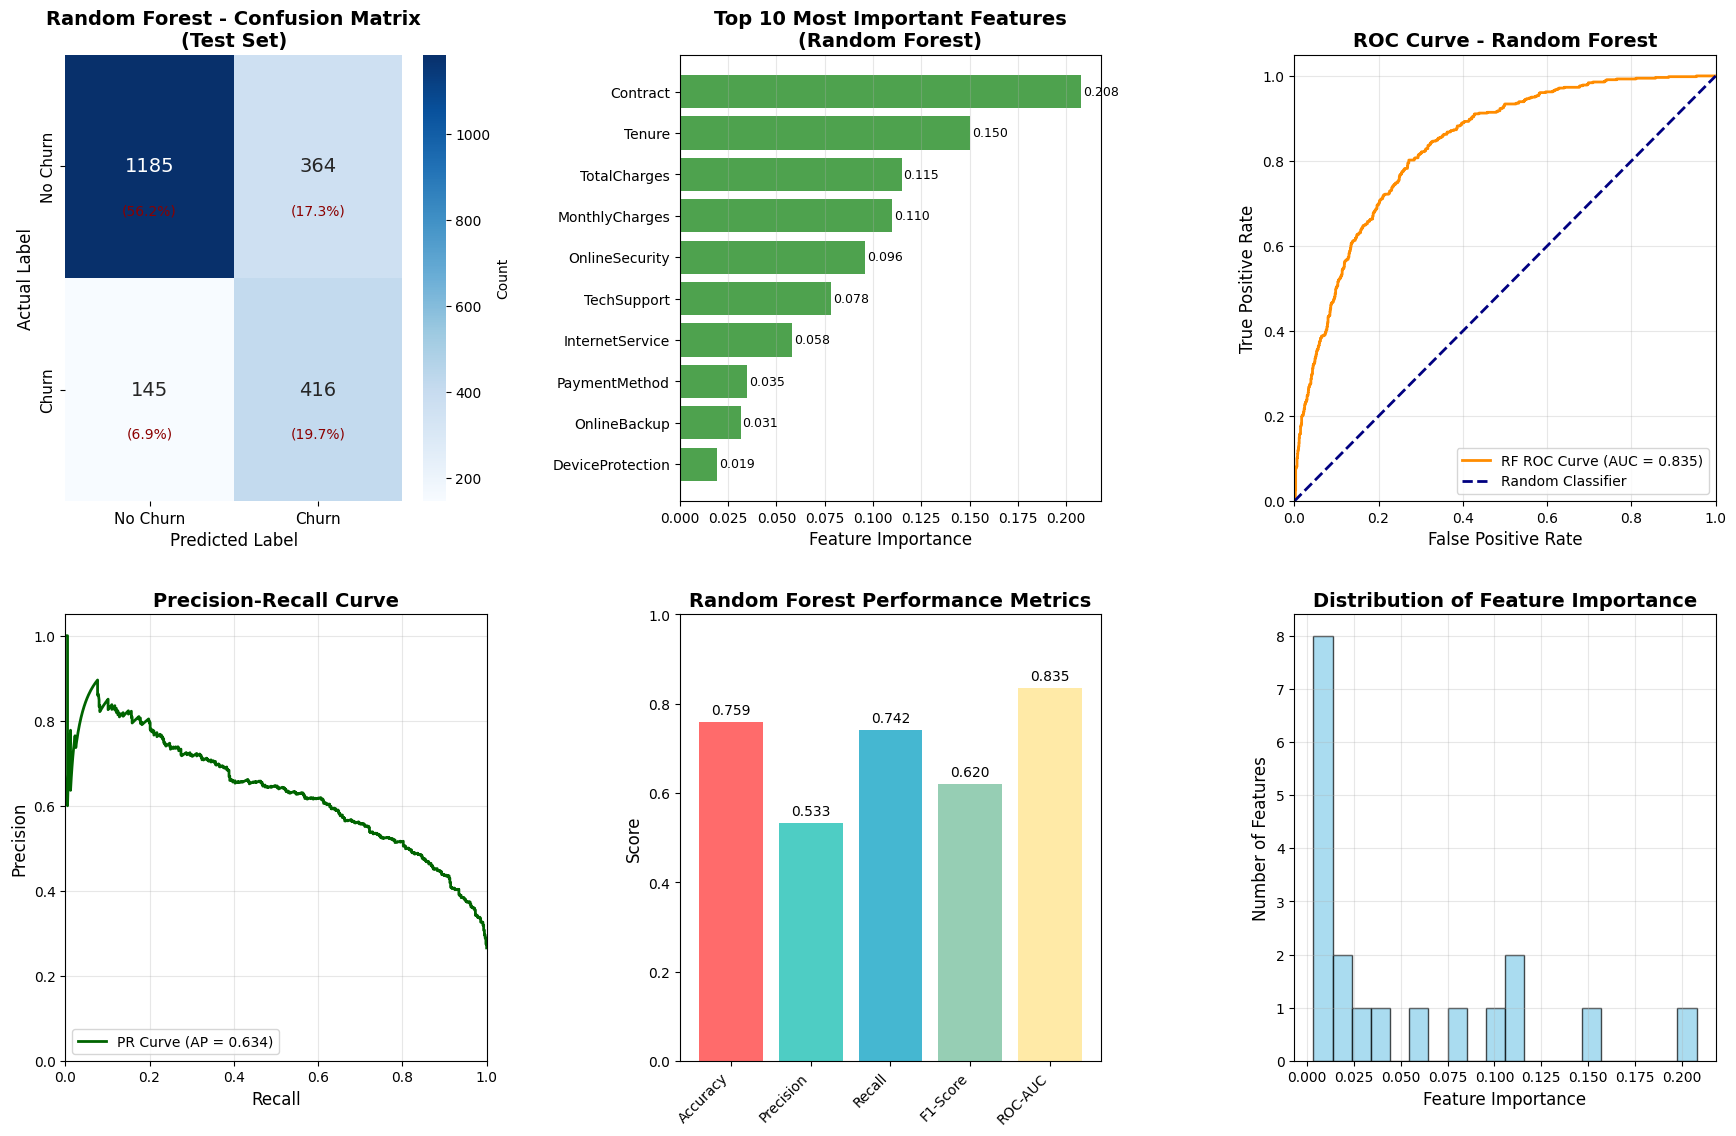

In [145]:
print("\n🌲 RANDOM FOREST DASHBOARD")
print("=" * 60)

# Create comprehensive visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create a figure with proper subplot arrangement
fig = plt.figure(figsize=(18, 12))

# 1. CONFUSION MATRIX HEATMAP
ax1 = plt.subplot(2, 3, 1)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax1,
            cbar_kws={'label': 'Count'}, annot_kws={'size': 14})
ax1.set_title('Random Forest - Confusion Matrix\n(Test Set)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Predicted Label', fontsize=12)
ax1.set_ylabel('Actual Label', fontsize=12)
ax1.set_xticklabels(['No Churn', 'Churn'], fontsize=11)
ax1.set_yticklabels(['No Churn', 'Churn'], fontsize=11)

# Add percentage annotations
total = cm_test.sum()
for i in range(cm_test.shape[0]):
    for j in range(cm_test.shape[1]):
        percentage = cm_test[i, j] / total * 100
        ax1.text(j + 0.5, i + 0.7, f'({percentage:.1f}%)',
                ha='center', va='center', fontsize=10, color='darkred')

# 2. TOP 10 FEATURE IMPORTANCE BAR PLOT
ax2 = plt.subplot(2, 3, 2)
top_10_features = feature_importance.head(10)
bars = ax2.barh(range(len(top_10_features)), top_10_features['importance'],
                color='forestgreen', alpha=0.8)
ax2.set_yticks(range(len(top_10_features)))
ax2.set_yticklabels(top_10_features['feature'], fontsize=10)
ax2.set_xlabel('Feature Importance', fontsize=12)
ax2.set_title('Top 10 Most Important Features\n(Random Forest)', fontsize=14, fontweight='bold')
ax2.grid(True, axis='x', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax2.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', ha='left', va='center', fontsize=9)

# Invert y-axis to show most important feature at top
ax2.invert_yaxis()

# 3. ROC CURVE
ax3 = plt.subplot(2, 3, 3)
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = test_metrics['ROC-AUC']
ax3.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'RF ROC Curve (AUC = {roc_auc:.3f})')
ax3.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
ax3.set_xlim([0.0, 1.0])
ax3.set_ylim([0.0, 1.05])
ax3.set_xlabel('False Positive Rate', fontsize=12)
ax3.set_ylabel('True Positive Rate', fontsize=12)
ax3.set_title('ROC Curve - Random Forest', fontsize=14, fontweight='bold')
ax3.legend(loc="lower right")
ax3.grid(True, alpha=0.3)

# 4. PRECISION-RECALL CURVE
ax4 = plt.subplot(2, 3, 4)
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_test_proba)
avg_precision = test_metrics['Average Precision']
ax4.plot(recall_vals, precision_vals, color='darkgreen', lw=2,
         label=f'PR Curve (AP = {avg_precision:.3f})')
ax4.set_xlim([0.0, 1.0])
ax4.set_ylim([0.0, 1.05])
ax4.set_xlabel('Recall', fontsize=12)
ax4.set_ylabel('Precision', fontsize=12)
ax4.set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')
ax4.legend(loc="lower left")
ax4.grid(True, alpha=0.3)

# 5. METRICS COMPARISON (if you have multiple models)
ax5 = plt.subplot(2, 3, 5)
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
metrics_values = [test_metrics['Accuracy'], test_metrics['Precision'],
                 test_metrics['Recall'], test_metrics['F1-Score'], test_metrics['ROC-AUC']]
bars = ax5.bar(metrics_names, metrics_values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
ax5.set_ylim([0, 1])
ax5.set_title('Random Forest Performance Metrics', fontsize=14, fontweight='bold')
ax5.set_ylabel('Score', fontsize=12)
plt.setp(ax5.get_xticklabels(), rotation=45, ha='right')

# Add value labels on bars
for bar, value in zip(bars, metrics_values):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{value:.3f}', ha='center', va='bottom', fontsize=10)

# 6. FEATURE IMPORTANCE DISTRIBUTION
ax6 = plt.subplot(2, 3, 6)
ax6.hist(feature_importance['importance'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
ax6.set_xlabel('Feature Importance', fontsize=12)
ax6.set_ylabel('Number of Features', fontsize=12)
ax6.set_title('Distribution of Feature Importance', fontsize=14, fontweight='bold')
ax6.grid(True, alpha=0.3)

# Adjust layout to prevent overlapping
plt.tight_layout(pad=3.0)
plt.show()



In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np

# Define the parameter grid
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),         # number of trees
    'max_depth': [None] + list(np.arange(5, 31, 5)),   # max depth of trees
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


In [147]:
# Initialize the base model
rf = RandomForestClassifier(random_state=42, class_weight='balanced')  # 'balanced' to help with imbalance

# Set up RandomizedSearchCV
search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,                    # number of different combinations to try
    scoring='roc_auc',            # primary scoring metric
    cv=5,                         # 5-fold cross-validation
    random_state=42,
    verbose=1,
    n_jobs=-1                    # use all processors
)



In [ ]:
# Fit the model to training data
search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", search.best_params_)



Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
# Evaluate the best model
best_rf = search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)
y_proba = best_rf.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))